In [1]:
# Import this necessary libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
total_years = np.array([[x] for x in range(1985, 2041)])



In [2]:
#Add this two lines to connect you colab with Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#This is full dataset(I took only supply data)
full_df=pd.read_csv('/content/drive/MyDrive/Arizona Department of Water Resources/Clean Data.csv')
full_df

,YEAR,AMA,SECTOR,CATEGORY,PARENT WATER TYPE OR SECTOR,BUDGET ELEMENT,QUANTITY
0,1985,PHOENIX AMA,Municipal,Supply,Groundwater,Groundwater,225094
1,1985,PHOENIX AMA,Municipal,Supply,Surface Water,Surface Water,360702
2,1985,PHOENIX AMA,Municipal,Supply,Spill,Spill,47705
3,1985,PHOENIX AMA,Industrial,Supply,Groundwater,Groundwater,69229
4,1985,PHOENIX AMA,Industrial,Supply,Surface Water,Surface Water,5810
...,...,...,...,...,...,...,...
2585,2020,TUCSON AMA,Agricultural,Supply,CAP,GSF (CAP),32644
2586,2020,TUCSON AMA,Agricultural,Supply,Effluent,Effluent,230
2587,2020,TUCSON AMA,Agricultural,Supply,Other,Other,44
2588,2020,TUCSON AMA,Indian,Supply,Groundwater,Groundwater,262


In [4]:
#Necessary Columns from full dataset
Selected_df=full_df[['YEAR','SECTOR','PARENT WATER TYPE OR SECTOR','QUANTITY']]
Selected_df

,YEAR,SECTOR,PARENT WATER TYPE OR SECTOR,QUANTITY
0,1985,Municipal,Groundwater,225094
1,1985,Municipal,Surface Water,360702
2,1985,Municipal,Spill,47705
3,1985,Industrial,Groundwater,69229
4,1985,Industrial,Surface Water,5810
...,...,...,...,...
2585,2020,Agricultural,CAP,32644
2586,2020,Agricultural,Effluent,230
2587,2020,Agricultural,Other,44
2588,2020,Indian,Groundwater,262


In [5]:
#This dataframe contains only Sector=='Municipal' data
Municipal_df=Selected_df.loc[Selected_df['SECTOR']=='Municipal']
Municipal_df

,YEAR,SECTOR,PARENT WATER TYPE OR SECTOR,QUANTITY
0,1985,Municipal,Groundwater,225094
1,1985,Municipal,Surface Water,360702
2,1985,Municipal,Spill,47705
13,1985,Municipal,Groundwater,13159
21,1985,Municipal,Groundwater,4579
...,...,...,...,...
2569,2020,Municipal,Groundwater,6136
2570,2020,Municipal,CAP,0
2571,2020,Municipal,Effluent,4655
2572,2020,Municipal,CAP,114285


In [6]:
#Adding spill quantity with Surface Water quantity
Municipal_df['PARENT WATER TYPE OR SECTOR'] = Municipal_df['PARENT WATER TYPE OR SECTOR'].replace('Spill','Surface Water')
Municipal_df['PARENT WATER TYPE OR SECTOR'].value_counts()

<ipython-input-6-cb0012fea3dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Municipal_df['PARENT WATER TYPE OR SECTOR'] = Municipal_df['PARENT WATER TYPE OR SECTOR'].replace('Spill','Surface Water')


Effluent                      256
Groundwater                   214
CAP                           166
Surface Water                 159
AWS Groundwater Accounting    147
Name: PARENT WATER TYPE OR SECTOR, dtype: int64

In [7]:
#This dataframe contains only Four major sources of municipal[sector] data
Selected_source_df=Municipal_df.loc[(Municipal_df['PARENT WATER TYPE OR SECTOR']=='Effluent')|(Municipal_df['PARENT WATER TYPE OR SECTOR']=='Groundwater')|(Municipal_df['PARENT WATER TYPE OR SECTOR']=='CAP')|(Municipal_df['PARENT WATER TYPE OR SECTOR']=='Surface Water')]
Selected_source_df=Selected_source_df.rename(columns = {'PARENT WATER TYPE OR SECTOR':'Source'}).reset_index()
Selected_source_df=Selected_source_df[['YEAR','Source','QUANTITY']] 
Selected_source_df

,YEAR,Source,QUANTITY
0,1985,Groundwater,225094
1,1985,Surface Water,360702
2,1985,Surface Water,47705
3,1985,Groundwater,13159
4,1985,Groundwater,4579
...,...,...,...
790,2020,Groundwater,6136
791,2020,CAP,0
792,2020,Effluent,4655
793,2020,CAP,114285


In [8]:
#This pivot table sums up specific sources's quantity for a particular year
table = pd.pivot_table(Selected_source_df, values='QUANTITY', index=['YEAR', 'Source'], aggfunc=np.sum)
final_df = pd.DataFrame(table.to_records())
final_df

,YEAR,Source,QUANTITY
0,1985,Groundwater,360052
1,1985,Surface Water,408617
2,1986,CAP,13036
3,1986,Effluent,3426
4,1986,Groundwater,434856
...,...,...,...
137,2019,Surface Water,333186
138,2020,CAP,506361
139,2020,Effluent,172277
140,2020,Groundwater,384010


In [9]:
#Every Dataframe is for a particular source's data
Effluent_df=final_df.loc[final_df['Source']=='Effluent']
CAP_df=final_df.loc[final_df['Source']=='CAP']
Groundwater_df=final_df.loc[final_df['Source']=='Groundwater']
Surface_df=final_df.loc[final_df['Source']=='Surface Water']

In [10]:
#This Dataframe is for overall yearly quantity
table_2 = pd.pivot_table(final_df, values='QUANTITY', index=['YEAR'], aggfunc=np.sum)
Yearly_df = pd.DataFrame(table_2.to_records())
Yearly_df


,YEAR,QUANTITY
0,1985,768669
1,1986,809906
2,1987,853694
3,1988,874681
4,1989,917763
5,1990,874427
6,1991,890200
7,1992,864988
8,1993,901979
9,1994,948717


#Yearly Quantity(All Four Sources) Trend

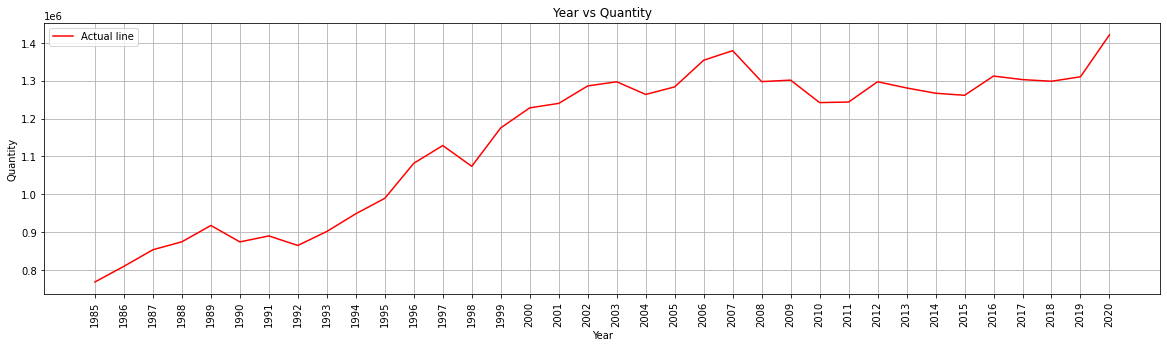

In [11]:
#This is actual line graph for Overall Quantity
plt.figure(figsize=(20, 5))
plt.plot(Yearly_df['YEAR'], Yearly_df['QUANTITY'], color = "red", label = "Actual line")
plt.title('Year vs Quantity')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(Yearly_df['YEAR'], rotation=90)
plt.grid(True)
plt.show()

In [12]:
#This snippet fits the model and predicts
X = Yearly_df['YEAR'].values.reshape(-1,1)
y = Yearly_df['QUANTITY']
reg = LinearRegression().fit(X, y)#Linear regression model is used for the prediction
y_pred = reg.predict(X)#This will predict quantity for Yearly_df['YEAR']

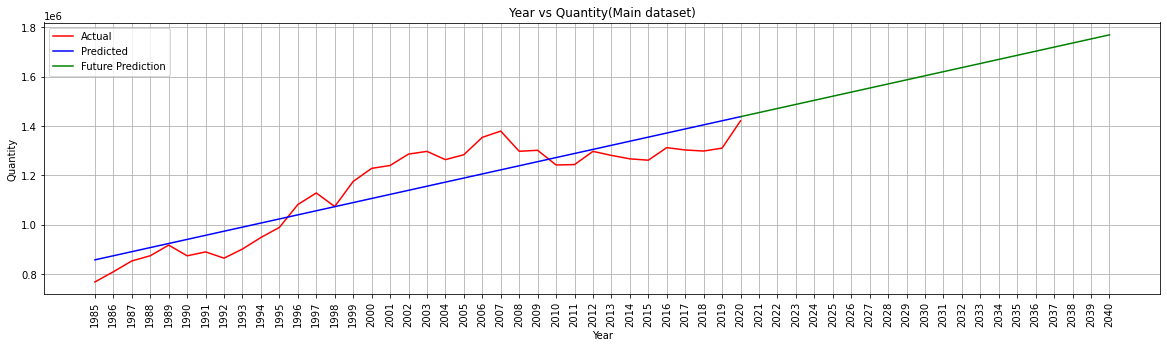

In [13]:
#This snippet actually shows the final outcomes
years = np.array([[x] for x in range(2020, 2041)])
yearly_predictions = reg.predict(years)#This will predict Effluent's quantity for next 10 years
plt.figure(figsize=(20, 5))
plt.plot(Yearly_df['YEAR'], Yearly_df['QUANTITY'], color = "red", label = "Actual")
plt.plot(Yearly_df['YEAR'], y_pred, color = "blue", label = "Predicted")
plt.plot(years, yearly_predictions, color = "green", label = "Future Prediction")
plt.title('Year vs Quantity(Main dataset)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(total_years, rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#Dataframe with predicted value(Overall)
Yearly_pred_df = pd.DataFrame({'YEAR': range(2020, 2041), 'QUANTITY': yearly_predictions})
Yearly_pred_df

,YEAR,QUANTITY
0,2020,1.437635e+06
1,2021,1.454193e+06
2,2022,1.470752e+06
3,2023,1.487310e+06
4,2024,1.503869e+06
5,2025,1.520427e+06
6,2026,1.536985e+06
7,2027,1.553544e+06
8,2028,1.570102e+06
9,2029,1.586660e+06


#Effluent Trend

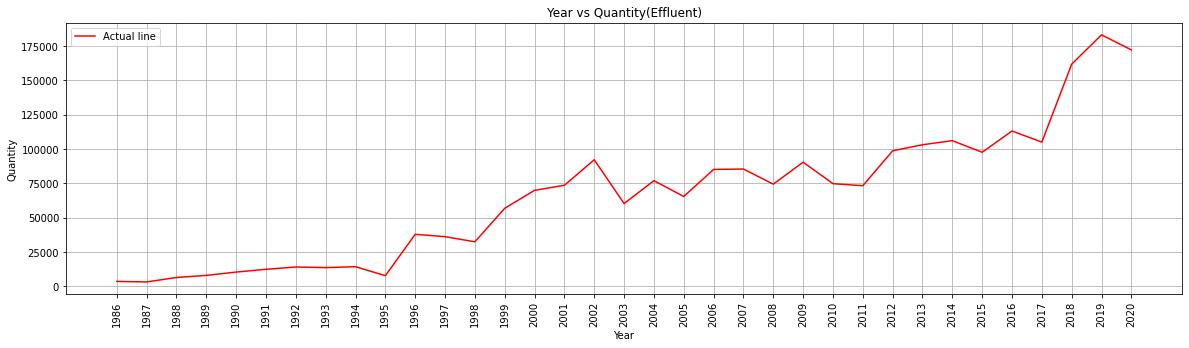

In [15]:
#This is actual line graph for source(Effluent)
plt.figure(figsize=(20, 5))
plt.plot(Effluent_df['YEAR'], Effluent_df['QUANTITY'], color = "red", label = "Actual line")
plt.title('Year vs Quantity(Effluent)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(Effluent_df['YEAR'], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#This snippet fits the model and predicts
Effluent_X = Effluent_df['YEAR'].values.reshape(-1,1)
Effluent_y = Effluent_df['QUANTITY']
Effluent_reg = LinearRegression().fit(Effluent_X, Effluent_y)#Linear regression model is used for the prediction
Effluent_pred = Effluent_reg.predict(Effluent_X)#This will predict quantity for Effluent_df['YEAR']

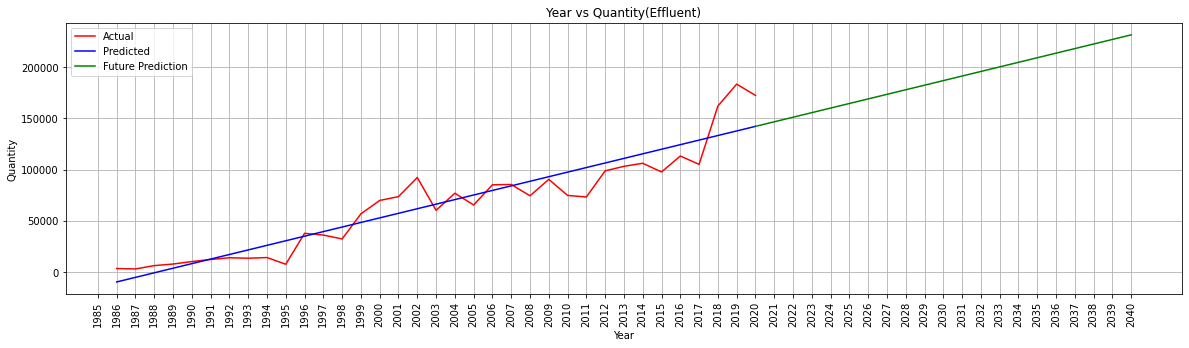

In [17]:
#This snippet actually shows the final outcomes
years = np.array([[x] for x in range(2020, 2041)])
Effluent_predictions = Effluent_reg.predict(years)#This will predict Effluent's quantity for next 10 years
plt.figure(figsize=(20,5))
plt.plot(Effluent_df['YEAR'], Effluent_df['QUANTITY'], color = "red", label = "Actual")
plt.plot(Effluent_df['YEAR'], Effluent_pred, color = "blue", label = "Predicted")
plt.plot(years, Effluent_predictions, color = "green", label = "Future Prediction")
plt.title('Year vs Quantity(Effluent)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(total_years, rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#Dataframe with predicted value(Efflulent)
Effluent_pred_df = pd.DataFrame({'YEAR': range(2020, 2041), 'QUANTITY': Effluent_predictions})
Effluent_pred_df

,YEAR,QUANTITY
0,2020,142067.942857
1,2021,146530.324370
2,2022,150992.705882
3,2023,155455.087395
4,2024,159917.468908
5,2025,164379.850420
6,2026,168842.231933
7,2027,173304.613445
8,2028,177766.994958
9,2029,182229.376471


#CAP Trend

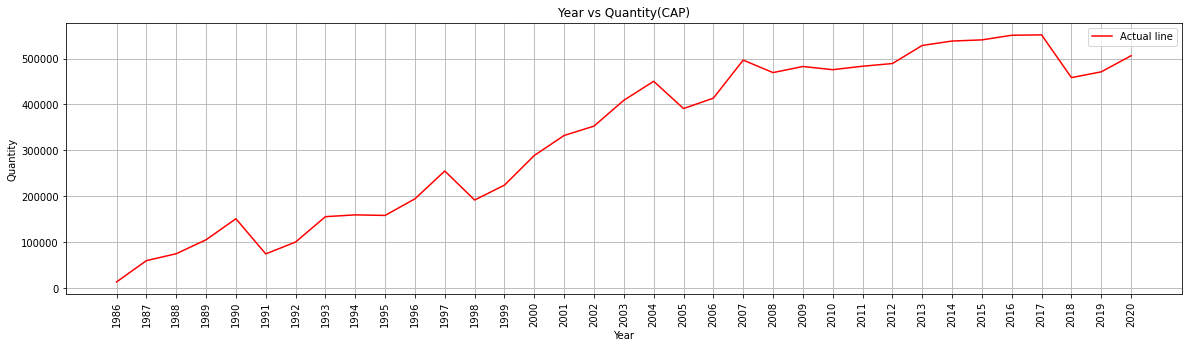

In [19]:
#This is actual line graph for source(CAP)
plt.figure(figsize=(20,5))
plt.plot(CAP_df['YEAR'], CAP_df['QUANTITY'], color = "red", label = "Actual line")
plt.title('Year vs Quantity(CAP)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(CAP_df['YEAR'], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#This snippet fits the model and predicts
CAP_X = CAP_df['YEAR'].values.reshape(-1,1)
CAP_y = CAP_df['QUANTITY']
CAP_reg = LinearRegression().fit(CAP_X, CAP_y)#Linear regression model is used for the prediction
CAP_pred = CAP_reg.predict(CAP_X)#This will predict quantity for CAP_df['YEAR']

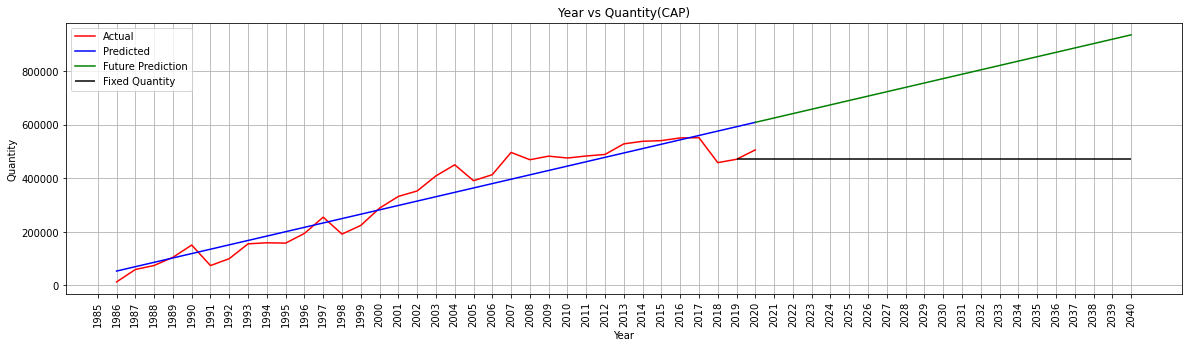

In [21]:
#This snippet actually shows the final outcomes
years = np.array([[x] for x in range(2020, 2041)])
CAP_predictions = CAP_reg.predict(years)#This will predict Effluent's quantity for next 10 years
plt.figure(figsize=(20, 5))
plt.plot(CAP_df['YEAR'], CAP_df['QUANTITY'], color = "red", label = "Actual")
plt.plot(CAP_df['YEAR'], CAP_pred, color = "blue", label = "Predicted")
plt.plot(years, CAP_predictions, color = "green", label = "Future Prediction")
plt.hlines(y=CAP_df['QUANTITY'][CAP_df['YEAR']==2019], xmin=2019, xmax=years[-1], color='black', label='Fixed Quantity')
plt.title('Year vs Quantity(CAP)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(total_years, rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#Dataframe with predicted value(CAP)
CAP_pred_df = pd.DataFrame({'YEAR': range(2020, 2041), 'QUANTITY': CAP_predictions})
CAP_pred_df

,YEAR,QUANTITY
0,2020,609129.909524
1,2021,625467.956303
2,2022,641806.003081
3,2023,658144.049860
4,2024,674482.096639
5,2025,690820.143417
6,2026,707158.190196
7,2027,723496.236975
8,2028,739834.283754
9,2029,756172.330532


#GroundWater Trend

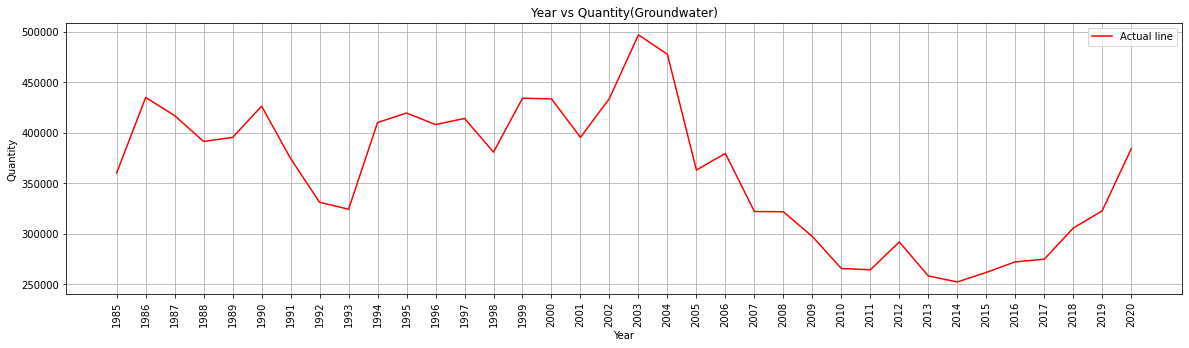

In [23]:
#This is actual line graph for source(Groundwater)
plt.figure(figsize=(20,5))
plt.plot(Groundwater_df['YEAR'], Groundwater_df['QUANTITY'], color = "red", label = "Actual line")
plt.title('Year vs Quantity(Groundwater)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(Groundwater_df['YEAR'], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [24]:
#This snippet fits the model and predicts
Groundwater_X = Groundwater_df['YEAR'].values.reshape(-1,1)
Groundwater_y = Groundwater_df['QUANTITY']
Groundwater_reg = LinearRegression().fit(Groundwater_X, Groundwater_y)#Linear regression model is used for the prediction
Groundwater_pred = Groundwater_reg.predict(Groundwater_X)#This will predict quantity for Groundwater_df['YEAR']

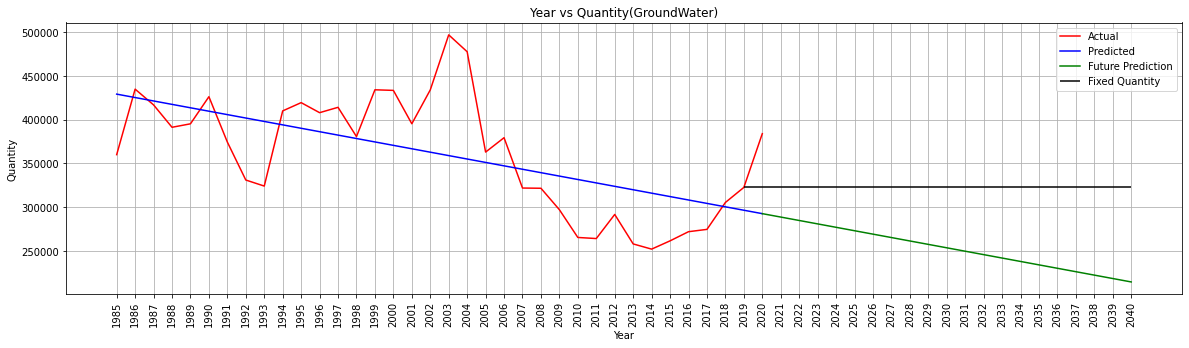

In [25]:
#This snippet actually shows the final outcomes
years = np.array([[x] for x in range(2020, 2041)])
Groundwater_predictions = Groundwater_reg.predict(years)#This will predict Effluent's quantity for next 10 years
plt.figure(figsize=(20, 5))
plt.plot(Groundwater_df['YEAR'], Groundwater_df['QUANTITY'], color = "red", label = "Actual")
plt.plot(Groundwater_df['YEAR'], Groundwater_pred, color = "blue", label = "Predicted")
plt.plot(years, Groundwater_predictions, color = "green", label = "Future Prediction")
plt.hlines(y=Groundwater_df['QUANTITY'][Groundwater_df['YEAR']==2019], xmin=2019, xmax=years[-1], color='black', label='Fixed Quantity')
plt.title('Year vs Quantity(GroundWater)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(total_years, rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#Dataframe with predicted value(Groundwater)
Groundwater_pred_df = pd.DataFrame({'YEAR': range(2020, 2041), 'QUANTITY': Groundwater_predictions})
Groundwater_pred_df

,YEAR,QUANTITY
0,2020,292682.186186
1,2021,288782.893651
2,2022,284883.601115
3,2023,280984.308580
4,2024,277085.016045
5,2025,273185.723509
6,2026,269286.430974
7,2027,265387.138438
8,2028,261487.845903
9,2029,257588.553368


#Surface Trend

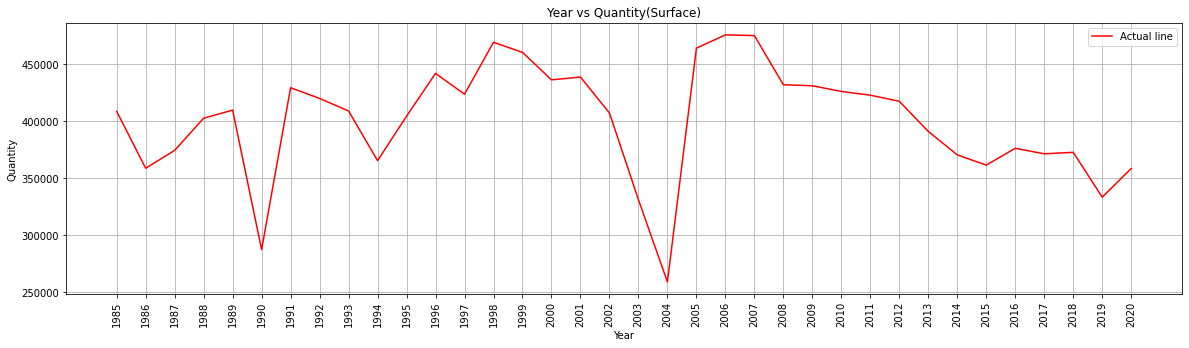

In [27]:
#This is actual line graph for source(Surface)
plt.figure(figsize=(20,5))
plt.plot(Surface_df['YEAR'], Surface_df['QUANTITY'], color = "red", label = "Actual line")
plt.title('Year vs Quantity(Surface)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(Surface_df['YEAR'], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [28]:
#This snippet fits the model and predicts
Surface_X = Surface_df['YEAR'].values.reshape(-1,1)
Surface_y = Surface_df['QUANTITY']
Surface_reg = LinearRegression().fit(Surface_X, Surface_y)#Linear regression model is used for the prediction
Surface_pred = Surface_reg.predict(Surface_X)#This will predict quantity for Surface_df['YEAR']

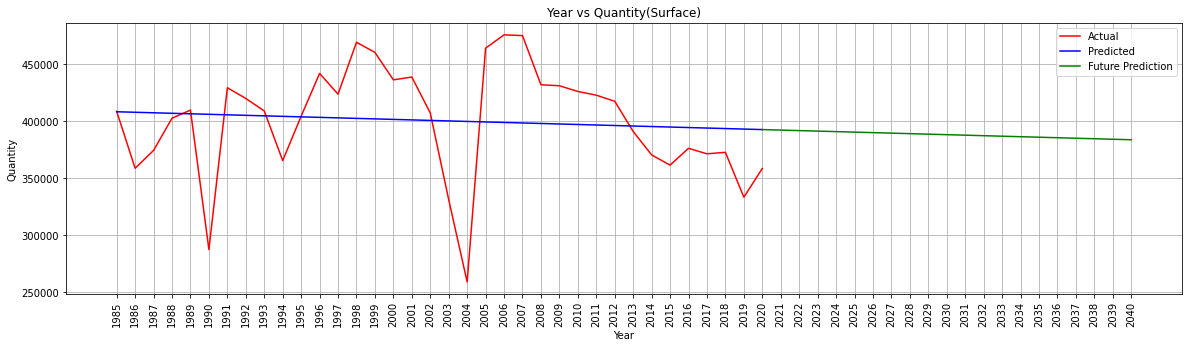

In [29]:
#This snippet actually shows the final outcomes
years = np.array([[x] for x in range(2020, 2041)])
Surface_predictions = Surface_reg.predict(years)#This will predict Effluent's quantity for next 10 years
plt.figure(figsize=(20, 5))
plt.plot(Surface_df['YEAR'], Surface_df['QUANTITY'], color = "red", label = "Actual")
plt.plot(Surface_df['YEAR'], Surface_pred, color = "blue", label = "Predicted")
plt.plot(years, Surface_predictions, color = "green", label = "Future Prediction")
plt.title('Year vs Quantity(Surface)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(total_years, rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [30]:
#Dataframe with predicted value(Surface)
Surface_pred_df = pd.DataFrame({'YEAR': range(2020, 2041), 'QUANTITY': Surface_predictions})
Surface_pred_df

,YEAR,QUANTITY
0,2020,392571.588589
1,2021,392124.373016
2,2022,391677.157443
3,2023,391229.941870
4,2024,390782.726298
5,2025,390335.510725
6,2026,389888.295152
7,2027,389441.079580
8,2028,388993.864007
9,2029,388546.648434
